# Tensorflow Basics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get data

In [2]:
df = pd.read_csv('files/kc_house_data.csv')
df.info() # 18 features and a target price

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# no missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


## Exploratory Data Analysis

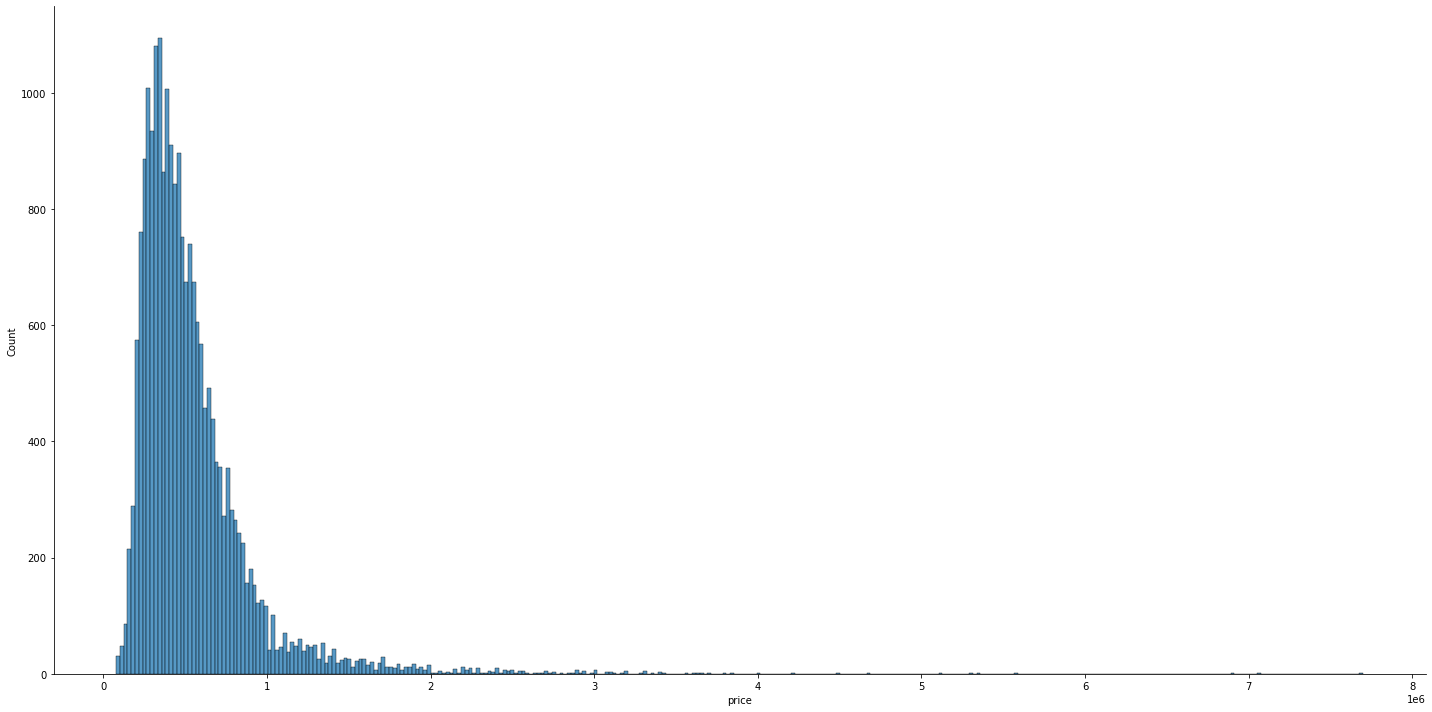

In [6]:
# right skewed, most houses in $0-1 M and some more expensive 
sns.displot(df['price'], height=10, aspect=2) # can drop highly priced outliers 

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

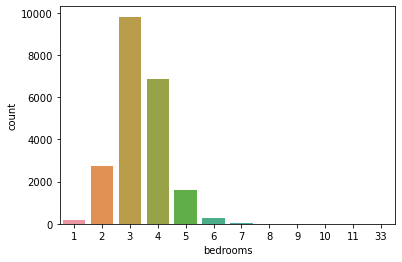

In [7]:
# 1-7 normally distributed around 3
sns.countplot(data=df, x='bedrooms')

In [8]:
# Check feature correlations with price
df.corr()['price'].sort_values(ascending=False) # square footage highly correlated with price

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

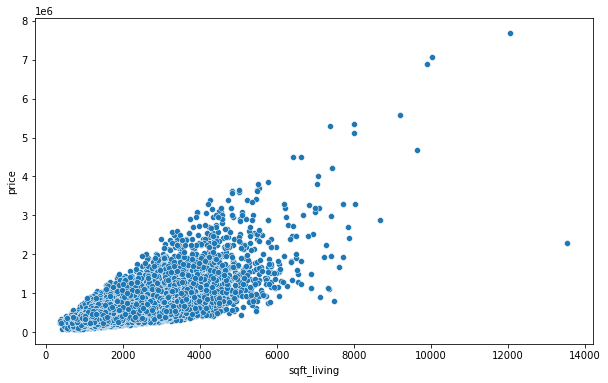

In [9]:
# visualize positive correlation 
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_living', y='price', data=df)

<AxesSubplot:xlabel='grade', ylabel='price'>

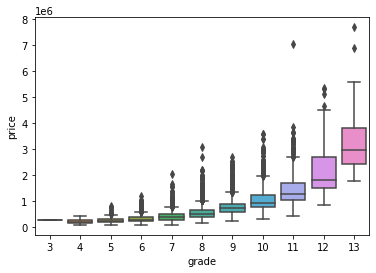

In [10]:
# higher grade = higher price
sns.boxplot(x='grade', y='price', data=df)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

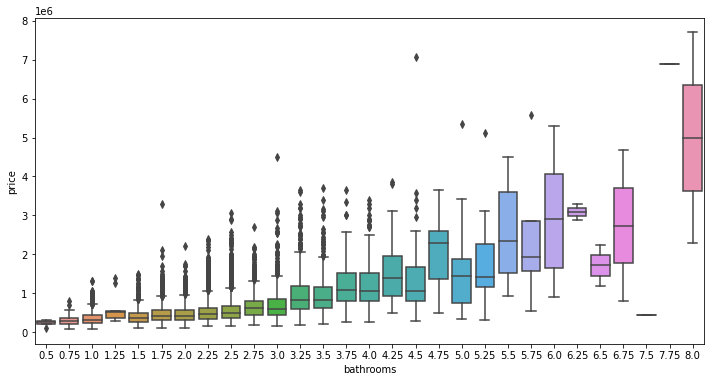

In [11]:
# more bathrooms --> higher price
plt.figure(figsize=(12,6))
sns.boxplot(x='bathrooms', y='price', data=df)

<AxesSubplot:xlabel='long', ylabel='lat'>

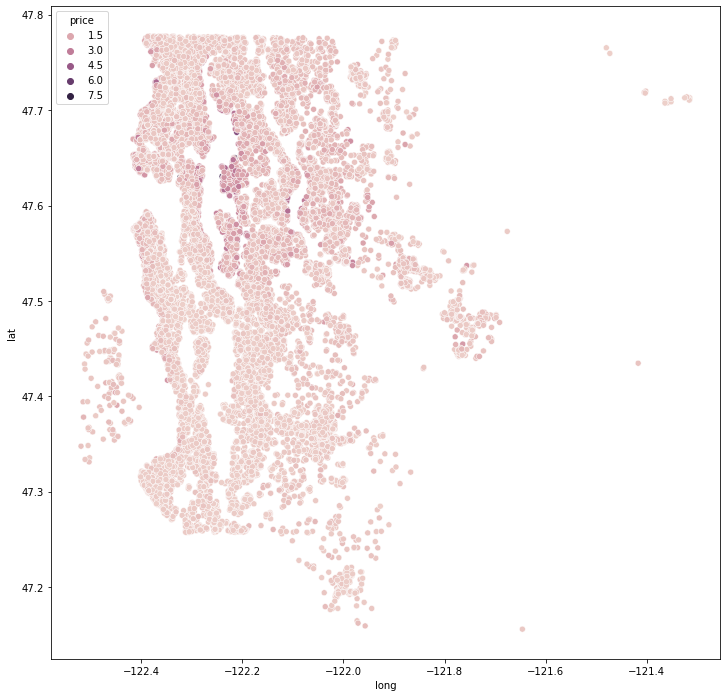

In [12]:
# expensive neighborhood at -122.2 and 47.6
plt.figure(figsize=(12,12))
sns.scatterplot(x='long',y='lat', data=df, hue='price')

In [13]:
# drop outlier houses to get better gradient
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


<AxesSubplot:xlabel='long', ylabel='lat'>

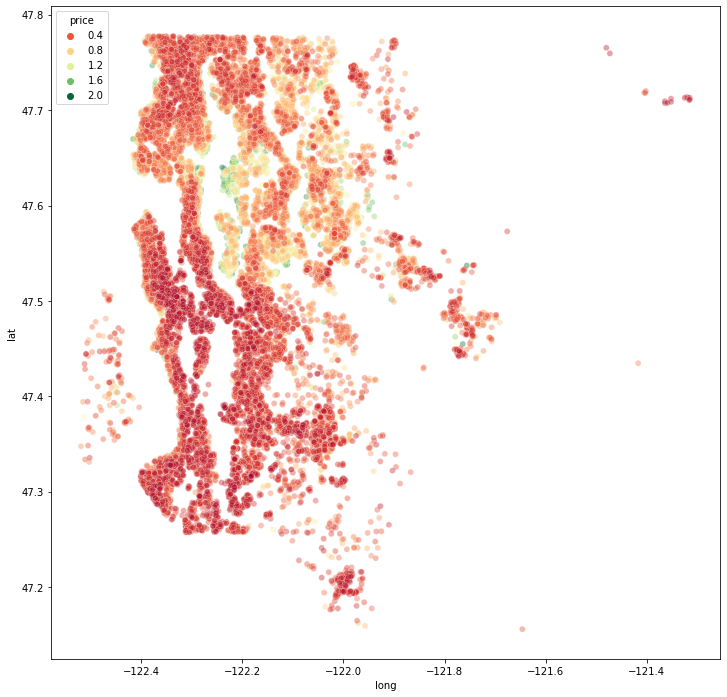

In [14]:
# Drop roughly top 1%
normal_houses = df.sort_values('price', ascending=False).iloc[200:]
plt.figure(figsize=(12,12))
# looks like expensive houses on waterfront
sns.scatterplot(x='long',y='lat', data=normal_houses, hue='price', alpha=0.4, palette='RdYlGn')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

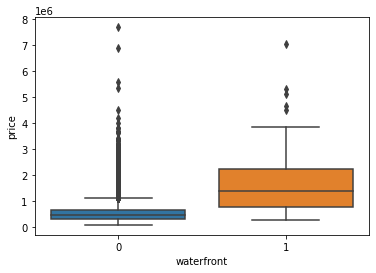

In [15]:
# Compare waterfront to non-waterfront houses
sns.boxplot(x='waterfront', y='price', data=df)

## Feature Engineering

In [16]:
df['id'] # not useful, can be dropped

0        7129300520
1        6414100192
2        5631500400
3        2487200875
4        1954400510
            ...    
21592     263000018
21593    6600060120
21594    1523300141
21595     291310100
21596    1523300157
Name: id, Length: 21597, dtype: int64

In [17]:
df = df.drop('id',axis=1)
df.head() # no more id 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
# date is not useful as a string
type(df['date'][0])

str

In [19]:
# convert to datetime object
df['date'] = pd.to_datetime(df['date'])
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# create new features based on date
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

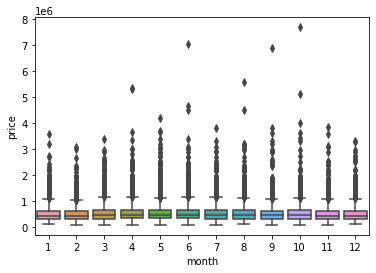

In [21]:
# Visually, no big difference by month 
sns.boxplot(x='month', y='price', data=df)

In [22]:
# prices more expensive during summer months than winter months (may be due to outliers seen in boxplot)
df.groupby('month').mean().sort_values('price', ascending=False)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
month,,,,,,,,,,,,,,,,,,,,
4,562215.615074,3.367878,2.107896,2060.743831,14273.263795,1.495065,0.008524,0.230597,3.358905,7.651413,1777.883804,282.860027,1971.731270,70.733961,98078.967250,47.560614,-122.213484,1986.577389,12653.579632,2015.000000
6,557534.318182,3.421488,2.165863,2131.163912,14258.142792,1.512167,0.008724,0.241047,3.460514,7.736915,1820.423324,310.740588,1970.723600,80.617080,98079.596419,47.565513,-122.214423,2033.827824,12835.893939,2014.000000
5,550849.746893,3.363712,2.116508,2090.514913,16678.293289,1.486123,0.005385,0.239022,3.420464,7.674399,1780.695940,309.818973,1970.216653,105.121375,98079.094863,47.565075,-122.214854,1990.449876,13694.719553,2014.267606
7,544892.161013,3.391678,2.146540,2128.246495,13857.654907,1.522162,0.006784,0.221167,3.442786,7.716870,1841.531886,286.714609,1971.777024,92.125283,98074.758933,47.560198,-122.206664,2029.130710,12584.116689,2014.000000
3,544057.683200,3.367467,2.065333,2021.968533,15604.088533,1.464267,0.006933,0.238933,3.355733,7.588267,1740.604800,281.363733,1970.597333,82.976533,98077.578667,47.553377,-122.214041,1951.490133,12678.426133,2015.000000
10,539439.447228,3.364072,2.120203,2085.705224,15389.313433,1.503465,0.008529,0.244670,3.412047,7.643923,1788.792111,296.913113,1970.111407,94.574094,98078.598081,47.562249,-122.217264,1981.493070,12880.621002,2014.000000
8,536655.212481,3.357401,2.123388,2085.100567,14643.078391,1.499484,0.006189,0.223311,3.440433,7.685921,1798.394533,286.706034,1972.044353,78.234141,98077.033522,47.564750,-122.209769,1995.968025,12966.646209,2014.000000
9,529723.517787,3.365330,2.133117,2079.319593,15365.775833,1.491248,0.008470,0.249012,3.431959,7.644833,1786.968379,292.351214,1970.534161,99.215697,98078.513834,47.560654,-122.213067,1983.068888,11887.396951,2014.000000
1,525963.251534,3.387526,2.129346,2085.094070,17869.721881,1.478528,0.008180,0.246421,3.347648,7.642127,1814.019427,271.074642,1971.749489,73.433538,98077.897751,47.553500,-122.212188,1975.859918,12687.026585,2015.000000


<AxesSubplot:xlabel='month'>

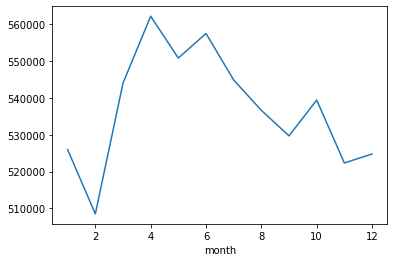

In [23]:
# summer month listings have slightly higher prices
df.groupby('month').mean()['price'].plot()

In [24]:
# slight increase year on year, expected with inflation 
df.groupby('year').mean()['price']

year
2014    539350.911777
2015    542279.005878
Name: price, dtype: float64

In [25]:
# After extracting useful info, we can drop the date column
df = df.drop('date', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [26]:
# 70 unique zipcode values, too much for this example to create dummy variables
df.zipcode.nunique() # in real life, can group zipcodes by vicinity and treat as categorical variable

70

In [27]:
# so we drop the zipcode for this model
df = df.drop('zipcode', axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


## Data Preprocessing

### Split to train and test

In [28]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)

### Scale features 

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
X_train_valid = scaler.fit_transform(X_train_valid)

In [34]:
X_test = scaler.transform(X_test)

### Create validation data

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Build model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()
# 19 features so start with 19 neurons
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

# output value is one price for this regression so 1 output neuron is sufficient
model.add(Dense(1))

### Compile model

In [38]:
# Use adam and MSE for regression with large datasets 
model.compile(optimizer='adam', loss='mse')

### Train model

In [39]:
model.fit(X_train, y_train, validation_data=(X_valid,y_valid), batch_size=128, epochs=400)

Epoch 1/400
89/89 [==============================] - 0s 2ms/step - loss: 418746728448.0000 - val_loss: 460282429440.0000
Epoch 2/400
89/89 [==============================] - 0s 998us/step - loss: 418555101184.0000 - val_loss: 459606556672.0000
Epoch 3/400
89/89 [==============================] - 0s 961us/step - loss: 415949783040.0000 - val_loss: 453188288512.0000
Epoch 4/400
89/89 [==============================] - 0s 952us/step - loss: 401024057344.0000 - val_loss: 424177532928.0000
Epoch 5/400
89/89 [==============================] - 0s 984us/step - loss: 351521931264.0000 - val_loss: 345170739200.0000
Epoch 6/400
89/89 [==============================] - 0s 937us/step - loss: 250762756096.0000 - val_loss: 219709112320.0000
Epoch 7/400
89/89 [==============================] - 0s 1ms/step - loss: 141792837632.0000 - val_loss: 131557023744.0000
Epoch 8/400
89/89 [==============================] - 0s 916us/step - loss: 98381094912.0000 - val_loss: 114709200896.0000
Epoch 9/400
89/89 [==

89/89 [==============================] - 0s 969us/step - loss: 40508428288.0000 - val_loss: 47599915008.0000
Epoch 69/400
89/89 [==============================] - 0s 899us/step - loss: 40236695552.0000 - val_loss: 47254372352.0000
Epoch 70/400
89/89 [==============================] - 0s 914us/step - loss: 39977918464.0000 - val_loss: 47008919552.0000
Epoch 71/400
89/89 [==============================] - 0s 947us/step - loss: 39697362944.0000 - val_loss: 46632005632.0000
Epoch 72/400
89/89 [==============================] - 0s 918us/step - loss: 39496458240.0000 - val_loss: 46385278976.0000
Epoch 73/400
89/89 [==============================] - 0s 944us/step - loss: 39294644224.0000 - val_loss: 46179844096.0000
Epoch 74/400
89/89 [==============================] - 0s 924us/step - loss: 39061164032.0000 - val_loss: 45824917504.0000
Epoch 75/400
89/89 [==============================] - 0s 916us/step - loss: 38846726144.0000 - val_loss: 45573935104.0000
Epoch 76/400
89/89 [=================

89/89 [==============================] - 0s 958us/step - loss: 32640079872.0000 - val_loss: 37717471232.0000
Epoch 136/400
89/89 [==============================] - 0s 929us/step - loss: 32592070656.0000 - val_loss: 37711810560.0000
Epoch 137/400
89/89 [==============================] - 0s 908us/step - loss: 32546611200.0000 - val_loss: 37605765120.0000
Epoch 138/400
89/89 [==============================] - 0s 920us/step - loss: 32511184896.0000 - val_loss: 37556330496.0000
Epoch 139/400
89/89 [==============================] - 0s 913us/step - loss: 32500197376.0000 - val_loss: 37498880000.0000
Epoch 140/400
89/89 [==============================] - 0s 910us/step - loss: 32446259200.0000 - val_loss: 37454168064.0000
Epoch 141/400
89/89 [==============================] - 0s 942us/step - loss: 32385810432.0000 - val_loss: 37386215424.0000
Epoch 142/400
89/89 [==============================] - 0s 899us/step - loss: 32378783744.0000 - val_loss: 37327667200.0000
Epoch 143/400
89/89 [=========

Epoch 202/400
89/89 [==============================] - 0s 980us/step - loss: 30669508608.0000 - val_loss: 34894843904.0000
Epoch 203/400
89/89 [==============================] - 0s 836us/step - loss: 30623836160.0000 - val_loss: 34860277760.0000
Epoch 204/400
89/89 [==============================] - 0s 904us/step - loss: 30652338176.0000 - val_loss: 34824589312.0000
Epoch 205/400
89/89 [==============================] - 0s 901us/step - loss: 30611273728.0000 - val_loss: 34798702592.0000
Epoch 206/400
89/89 [==============================] - 0s 905us/step - loss: 30590959616.0000 - val_loss: 34784985088.0000
Epoch 207/400
89/89 [==============================] - 0s 888us/step - loss: 30581379072.0000 - val_loss: 34776039424.0000
Epoch 208/400
89/89 [==============================] - 0s 947us/step - loss: 30582022144.0000 - val_loss: 34759221248.0000
Epoch 209/400
89/89 [==============================] - 0s 922us/step - loss: 30537756672.0000 - val_loss: 34703167488.0000
Epoch 210/400
89

Epoch 269/400
89/89 [==============================] - 0s 993us/step - loss: 29757556736.0000 - val_loss: 33623764992.0000
Epoch 270/400
89/89 [==============================] - 0s 922us/step - loss: 29737670656.0000 - val_loss: 33627295744.0000
Epoch 271/400
89/89 [==============================] - 0s 892us/step - loss: 29763938304.0000 - val_loss: 33580877824.0000
Epoch 272/400
89/89 [==============================] - 0s 918us/step - loss: 29726742528.0000 - val_loss: 33570201600.0000
Epoch 273/400
89/89 [==============================] - 0s 925us/step - loss: 29732870144.0000 - val_loss: 33597206528.0000
Epoch 274/400
89/89 [==============================] - 0s 954us/step - loss: 29703331840.0000 - val_loss: 33645010944.0000
Epoch 275/400
89/89 [==============================] - 0s 969us/step - loss: 29697691648.0000 - val_loss: 33568958464.0000
Epoch 276/400
89/89 [==============================] - 0s 1000us/step - loss: 29690607616.0000 - val_loss: 33504145408.0000
Epoch 277/400
8

Epoch 336/400
89/89 [==============================] - 0s 965us/step - loss: 29212678144.0000 - val_loss: 32830902272.0000
Epoch 337/400
89/89 [==============================] - 0s 956us/step - loss: 29226174464.0000 - val_loss: 32870428672.0000
Epoch 338/400
89/89 [==============================] - 0s 950us/step - loss: 29210820608.0000 - val_loss: 32879515648.0000
Epoch 339/400
89/89 [==============================] - 0s 934us/step - loss: 29225469952.0000 - val_loss: 32846467072.0000
Epoch 340/400
89/89 [==============================] - 0s 962us/step - loss: 29200029696.0000 - val_loss: 32774111232.0000
Epoch 341/400
89/89 [==============================] - 0s 972us/step - loss: 29179342848.0000 - val_loss: 32791068672.0000
Epoch 342/400
89/89 [==============================] - 0s 925us/step - loss: 29154760704.0000 - val_loss: 32746803200.0000
Epoch 343/400
89/89 [==============================] - 0s 962us/step - loss: 29163341824.0000 - val_loss: 32738848768.0000
Epoch 344/400
89

### Get training history

<AxesSubplot:>

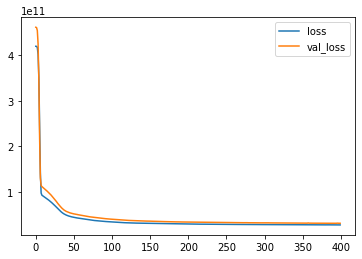

In [40]:
# close trend between loss and validation loss means no overfitting 
losses = pd.DataFrame(model.history.history)
losses.plot()

### Make predictions 

In [43]:
predictions = model.predict(X_test)

### Evaluate model performance

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [44]:
print("MAE: ", mean_absolute_error(y_test, predictions))
print("MSE: ", mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  107371.52373770255
MSE:  30028283697.34995
RMSE:  173286.70952311938


In [46]:
# 32% error
np.sqrt(mean_squared_error(y_test, predictions)) / df['price'].mean() * 100

32.07251683992586

In [47]:
# our model explains 76% of variance in data
explained_variance_score(y_test, predictions)

0.7642834182816407

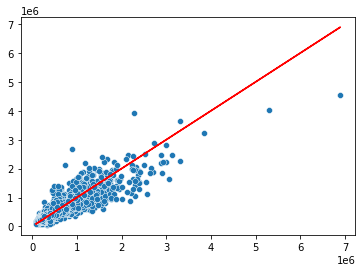

In [55]:
sns.scatterplot(x = y_test, y = predictions.reshape(5400,))
plt.plot(y_test, y_test, 'r') # perfect prediction line

### Use model to predict on new data

In [65]:
# grab any data point
single_house = df.iloc[200].drop('price')
single_house

bedrooms             3.0000
bathrooms            1.0000
sqft_living        860.0000
sqft_lot         11725.0000
floors               1.0000
waterfront           0.0000
view                 0.0000
condition            4.0000
grade                6.0000
sqft_above         860.0000
sqft_basement        0.0000
yr_built          1943.0000
yr_renovated         0.0000
lat                 47.5093
long              -122.1840
sqft_living15     1300.0000
sqft_lot15        9514.0000
year              2015.0000
month                3.0000
Name: 200, dtype: float64

In [66]:
single_house = scaler.transform(single_house.to_numpy().reshape(-1, 19))
single_house

array([[0.0625    , 0.06666667, 0.04195205, 0.00678746, 0.        ,
        0.        , 0.        , 0.75      , 0.3       , 0.0597561 ,
        0.        , 0.37391304, 0.        , 0.56844137, 0.2782392 ,
        0.15505077, 0.01018093, 1.        , 0.18181818]])

In [67]:
model.predict(single_house) # predicts 259K price

array([[259627.86]], dtype=float32)

In [68]:
df['price'].iloc[200] # actual price was 210K

210000.0

In [70]:
float(model.predict(single_house)) - df['price'].iloc[200] # our model was off by $49K

49627.859375

### Save model

In [72]:
model.save('files/kc_housing_model.h5')